<a href="https://colab.research.google.com/github/QuanPhamAnh/Coursera_Capstone/blob/main/%20IBM%20DS%20/%20Applied%20Data%20Science%20Capstone%20Project%20/%20Week%204-5%20/Final%20Assignment%20Report.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <center>IBM Data Science Course Capstone Project</center>


# <center> New Restaurant in Vietnam: What and Where to Start </center>

## Table of contents
* [Introduction](#introduction)
* [Business Problem](#problem)
* [Data](#data)
* [Methodology](#methodology)
* [Analysis](#analysis)
* [Results and Discussion](#results)
* [Conclusion](#conclusion)

## Introduction <a name="introduction"></a>

This is my final effort for my first steps in Data Science career by finishing IBM Data Science Professional Certificate course. Here is my report for the capstone project of that course. I will use data science toolset I have learned on a real-life problem. I used Python to perform analysis and you can find the notebook at the end of the post for more information.

## Business Problem <a name="problem"></a>

Assume there is a businessman who wants to open a brand new restaurant in Vietnam. So, he wants to know where should he open his high-end restaurant and what cuisine it would serves. Therefore, he as me to analyse and solve that problem.



The assumption behind the analysis is that we use unsupervised machine learning, in this case is k-means cluster, to create clusters of pin location in two biggest city in Vietnam (Ha Noi and Ho Chi Minh City) and that will provide us with areas for consideration for the restaurant and which cuisine it should serve.

## Data <a name="data"></a>

For this project, we need the following data:


1.   Information of restaurants in Ha Noi and Ho Chi Minh City: We can get this data from Foursquare like what we have learned. But in Vietnam, Foursquare data is not good as [Foody](https://foody.vn). <br><br>
Foody is a Vietnam-based company provides food recommendations, restaurant listings and value added services such as order delivery, reservations, vouchers or coupons to create culinary experiences for the customers in the local market. With more than 12,842,743 monthly web visitors, Foody.vn is ranked 16,868 among websites globally (March 7th, 2021). <br><br>
However, foody doesn't public there API (or I don't know where it is), so I have to crawl data using *requests* and *BeautifulSoup*.<br><br>
Data from Foody contain many features of restaurants we can use in our project: location, cuisine, rating, number of reviews, check in,...



In [ ]:
sub_result.head()

,Name,Address,District,City,Rating,Cuisine,Latitude,Longitude,Total Check-in
0,Pizza 4P’s - Pizza Kiểu Nhật - Lê Thánh Tôn,"8/15 Lê Thánh Tôn, P. Bến Nghé",Quận 1,TP. HCM,8.0,Ý,10.781878,106.705055,516
1,Pizza 4P's - Pizza Kiểu Nhật - Thủ Khoa Huân,"8 Thủ Khoa Huân, P. Bến Thành",Quận 1,TP. HCM,8.4,Ý,10.773458,106.697516,53
2,Pizza 4P’s - Pizza Kiểu Nhật - Nguyễn Văn Linh,"Lô MD2, Nguyễn Văn Linh, P Tân Phú",Quận 7,TP. HCM,8.1,Ý,10.731467,106.715654,59
3,Pizza 4P's - Pizza Kiểu Nhật - Hai Bà Trưng,151 Hai Bà Trưng,Quận 3,TP. HCM,8.2,Món Nhật,10.783351,106.697177,36
4,Pizza 4P's - Pizza Kiểu Nhật - Saigon Centre,"01 - 2 Lầu 6 Saigon Centre, 65 Lê Lợi, P. Bến ...",Quận 1,TP. HCM,8.5,Món Nhật,10.773726,106.700877,26



2.   List of post location in Ha Noi and Ho Chi Minh City: postcode system in Vietnam is not very useful and I can't use geocode to get latitude and longitude from address. Therefore, I use data from [postcodequery](https://postcodequery.com) to get address and GPS coordinates of location.


In [ ]:
pin_df.head()

,Pin,Latitude,Longitude
0,"Cong Vi, Ba Dinh, Ha Noi (21.03482, 105.80894)",21.03482,105.80894
1,"Giang Vo, Ba Dinh, Ha Noi (21.02755, 105.81743)",21.02755,105.81743
2,"Kim Ma, Ba Dinh, Ha Noi (21.03080, 105.82352)",21.03080,105.82352
3,"Lieu Giai, Ba Dinh, Ha Noi (21.03836, 105.81676)",21.03836,105.81676
4,"Ngoc Ha, Ba Dinh, Ha Noi (21.03872, 105.82751)",21.03872,105.82751


In [ ]:
map_hn

In [ ]:
map_hcmc

## Methodology <a name="methodology"></a>

In this project, we will using Foody data to get restaurants information (rating, cuisine and location) in Ha Noi and Ho Chi Minh city. 
<br>Next, we need some mark location to group restaurants together. I use posts address as pin locations on map.
<br>Then we group restaurants in 1 km radius of pin location to find out what is most common, most rating and most favourite cuisine in pin radius.
<br>Finally, we cluster pin locations using K means to determine locations where our restaurant should open and what cuisine it would serve.


## Analysis <a name="analysis"></a>

First, we will glance through some general infomation of restaurants in Ha Noi and Ho Chi Minh city.

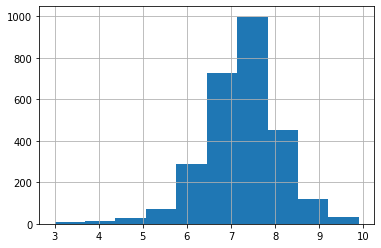

In [ ]:
restaurant_df[restaurant_df['Total Review'] >= 10]['Rating'].hist()

Using the histogram of rating score per restaurant, we can see most restaurants get rated around 7-8.

In [ ]:
filtered_restaurant_df['City'].value_counts()

TP. HCM    1816
Hà Nội      922
Name: City, dtype: int64

Look like there is more restaurants in Ho Chi Minh City (at least on Foody) than Hanoi (2 times).

In [ ]:
pd.pivot_table(filtered_restaurant_df, index = 'City', aggfunc={'Rating':np.mean, 'Total Review':np.sum})

,Rating,Total Review
City,,
Hà Nội,7.268196,44646
TP. HCM,7.295179,130249


People in Ho Chi Minh post their reviews on Foody more often. <br> Average rating of restaurants in  both city is the same.

Let's look at restaurants by district in both city



In [ ]:
restaurant_by_district = filtered_restaurant_df.groupby(['City','District'])['Name'].count()
print('Hà Nội \n\n', restaurant_by_district['Hà Nội'].sort_values(ascending = False), '\n\nTP.HCM \n\n', restaurant_by_district['TP. HCM'].sort_values(ascending = False))

Hà Nội 

 District
Quận Cầu Giấy        203
Quận Hoàn Kiếm       190
Quận Ba Đình         175
Quận Đống Đa         172
Quận Hai Bà Trưng    166
Quận Thanh Xuân       91
Quận Tây Hồ           67
Quận Nam Từ Liêm      64
Quận Long Biên        49
Quận Hà Đông          38
Quận Hoàng Mai        29
Quận Bắc Từ Liêm      11
Huyện Sóc Sơn          2
Huyện Quốc Oai         2
Huyện Gia Lâm          2
Huyện Đông Anh         1
Huyện Hoài Đức         1
Huyện Chương Mỹ        1
Name: Name, dtype: int64 

TP.HCM 

 District
Quận 1              715
Quận 3              212
Quận 7              205
Quận Bình Thạnh     150
Quận 2              147
Quận Tân Bình       136
Quận 10             116
Quận Tân Phú         92
Quận Gò Vấp          89
Quận Phú Nhuận       84
Quận 5               82
Quận Thủ Đức         71
Quận Bình Tân        47
Quận 11              35
Quận 6               23
Quận 4               22
Quận 12              22
Quận 9               21
Quận 8               20
Huyện Bình Chánh     12
Huyện

In Ha Noi, restaurants are centralized in 5 district: Cau Giay, Hoan Kiem, Dong Da, Ba Dinh, Hai Ba Trung. District which have less than 10 restaurants may be dropped out because we filter out neighborhoods which less than 3 restaurants in 1 km radius. <br>
In Ho Chi Minh, 1/3 restaurants is in District 1, which is the center of the city. District 3, 7 have more than 200 restaurants. Many towns on the outskirt of the city will be dropped out too.

Then we count our restaurants by cuisines.


In [ ]:
filtered_restaurant_df['Cuisine'].value_counts()

Món Việt          1252
Món Nhật           544
Món Hàn            413
Châu Mỹ            199
Món Trung Hoa      175
Quốc tế            160
Món Âu             158
Món Á              155
Ý                  153
Món Thái           102
Pháp                68
Món Bắc             55
Singapore           37
Món Ấn Độ           27
Món Miền Nam        26
Món Miền Trung      25
Đức                 10
Đông Âu              7
Trung Đông           6
Mỹ                   4
Úc                   3
Hà Nội               2
Bắc Âu               2
Malaysia             1
Brazil               1
Món Quảng            1
Philippines          1
Name: Cuisine, dtype: int64

Grouping some minor cuisines (< 40 index) into bigger group and translate into English

In [ ]:
filtered_restaurant_df['Cuisine'].value_counts()

Vietnamese       1361
Japanese          544
Korean            413
American          204
Asian             194
International     193
Western           180
Chinese           175
Italian           153
Thai              102
French             68
Name: Cuisine, dtype: int64

Of course Vietnamese's restaurants will be majority. I will filter out Vietnamese cuisine restaurant because I want foreign cuisine restaurant only. <br>
Japanese's and Korean's restaurants are almost a half of the rest restaurants.

Text(0.5, 0.98, 'Percentage of Cuisines')

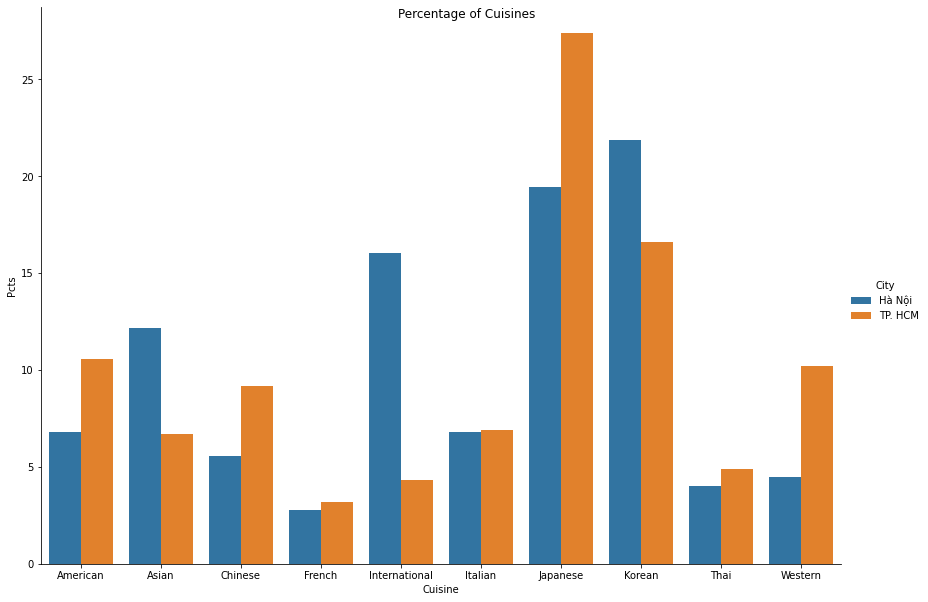

In [ ]:
ax = sns.catplot(data = cuisine_pcts.reset_index(), x = 'Cuisine', y = 'Pcts', hue = 'City', kind = 'bar', height=8.27, aspect=11.7/8.27)
ax.fig.suptitle('Percentage of Cuisines')

Japanese's restaurants is majority in Ho Chi Minh city (27.4 %) but restaurants in Ha Noi serve Korean cuisines more than the rest (21.9%). <br>
We can see that restaurants in Ha Noi are more diverse, maybe because Ha Noi have lots of diplomatic missions for many countries.

Text(0.5, 0.98, 'Rating per Cuisine')

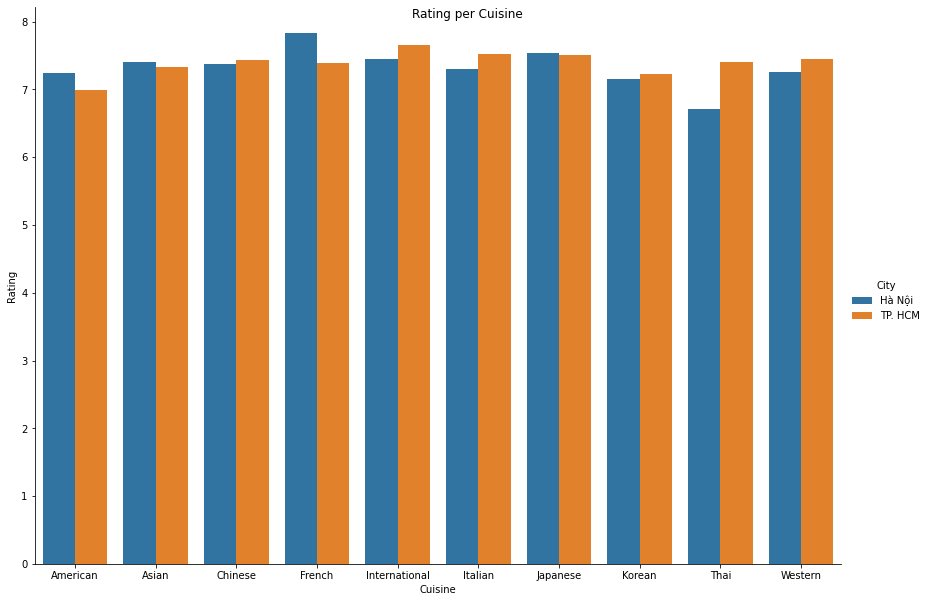

In [ ]:
ax = sns.catplot(data = rating_df.reset_index(), x = 'Cuisine', y = 'Rating', hue = 'City', kind = 'bar', height=8.27, aspect=11.7/8.27)
ax.fig.suptitle('Rating per Cuisine')

Rating of each cuisines is around average rating (7.0), we don't get much infomation from this.

After groupping restaurants by its pin locations and using some methods, we have ranking table of each pin locations by common, rating and average favourite per cuisine.

In [ ]:
restaurant_cuisine_sorted

,Cluster Labels,Nearest pin,1st Most Common Cuisine,2nd Most Common Cuisine,3rd Most Common Cuisine,1st Most Rating Cuisine,2nd Most Rating Cuisine,3rd Most Rating Cuisine,1st Most Favourite Cuisine,2nd Most Favourite Cuisine,3rd Most Favourite Cuisine
0,0,"An Loc, Binh Tan, Ho Chi Minh (10.74416, 106.6...",Japanese,Korean,Thai,Asian,Japanese,International,Japanese,Korean,Chinese
1,2,"An Phu, Quan 2, Ho Chi Minh (10.79776, 106.75633)",Korean,Thai,Japanese,Korean,Chinese,Thai,Thai,Chinese,Korean
2,1,"Bach Dang, Hai Ba Trung, Ha Noi (21.01508, 105...",Korean,Japanese,International,International,French,Asian,Asian,French,International
3,3,"Bach Khoa, Hai Ba Trung, Ha Noi (21.00438, 105...",Japanese,Korean,Asian,French,Chinese,International,American,Japanese,Chinese
4,1,"Bach Mai, Hai Ba Trung, Ha Noi (21.00053, 105....",Asian,Korean,American,Asian,International,Korean,International,Korean,Italian
5,3,"Ben Nghe, Quan 1, Ho Chi Minh (10.78121, 106.7...",Japanese,Western,Korean,Italian,International,American,Italian,Thai,American
6,3,"Ben Thanh, Quan 1, Ho Chi Minh (10.77412, 106....",Japanese,Western,Chinese,Japanese,International,French,Korean,Western,Italian
7,2,"Binh An, Quan 2, Ho Chi Minh (10.79115, 106.72...",Japanese,Korean,Asian,Asian,Japanese,American,Japanese,Chinese,Korean
8,3,"Binh Thanh, Binh Thanh, Ho Chi Minh (10.79132,...",Japanese,Italian,Korean,Thai,Western,Italian,International,Chinese,Japanese
9,0,"Binh Thanh, Binh Thanh, Ho Chi Minh (10.79267,...",Japanese,Korean,Asian,Thai,Asian,Japanese,American,Japanese,Korean


We visualize the table using bar chart.

Most common cuisines Rank Chart:

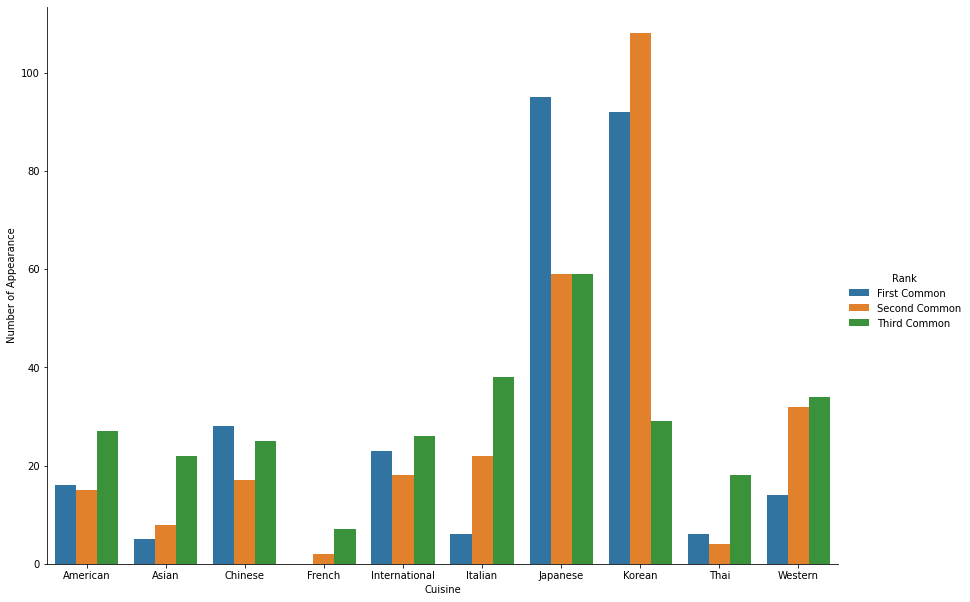

In [ ]:
MakeRankChart('Common')

Highest average rating cuisines Rank Chart:

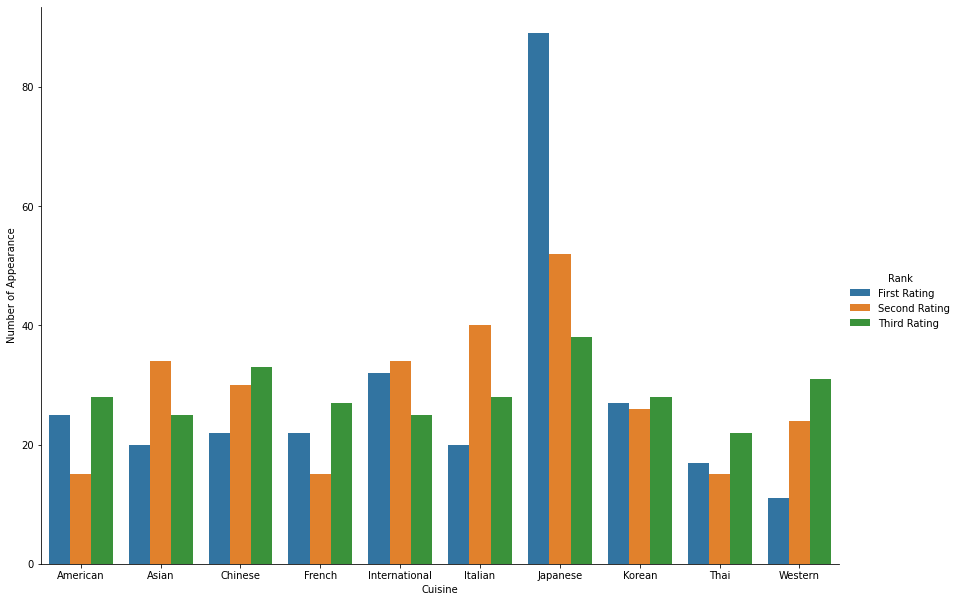

In [ ]:
MakeRankChart('Rating')

Most favourite cuisines per restaurants Rank Chart:

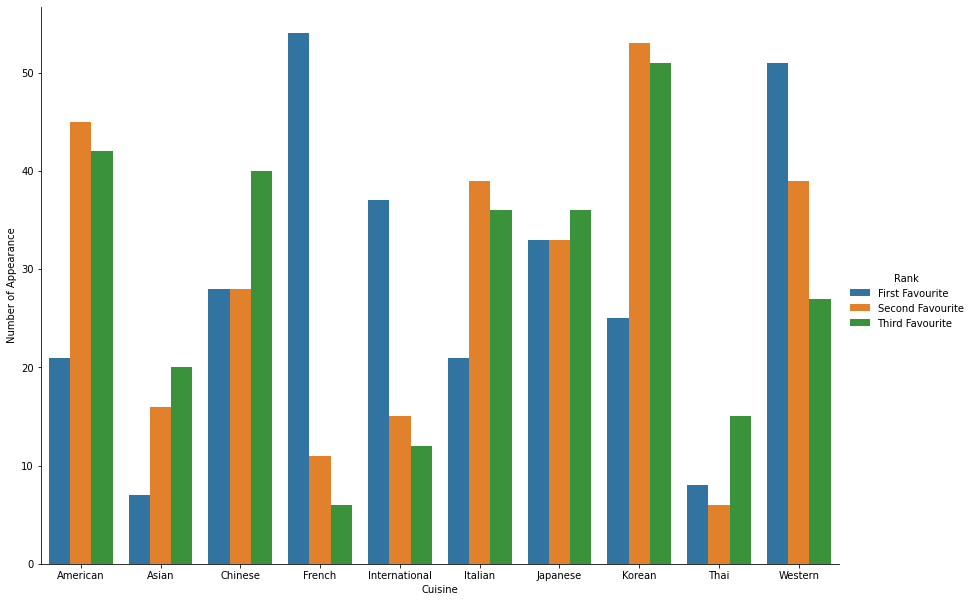

In [ ]:
MakeRankChart('Favourite')

Using the information we get from our data, we cluster pin locations into 4 clusters using K means.

Let's visualize our clusters on map using folium, here we have cluster 1 is <font color='fuchsia'> fuchsia </font>, cluster 2 is <font color='cyan'> cyan </font>, cluster 3 is <font color='steelblue'>blue</font> and cluster 4 is <font color='indigo'>indigo</font>.


Clusters in Ha Noi

In [ ]:
hn_map_clusters

Clusters in Ho Chi Minh City

In [ ]:
hcmc_map_clusters

Look at both map, we can see the similarity of two cities. Both cities have cluster 4 in the center, next to them is cluster 3. Cluster 1 and 2 are farther from the center.

Let's see what is favourite cuisines in each cluster. 

### Cluster 1

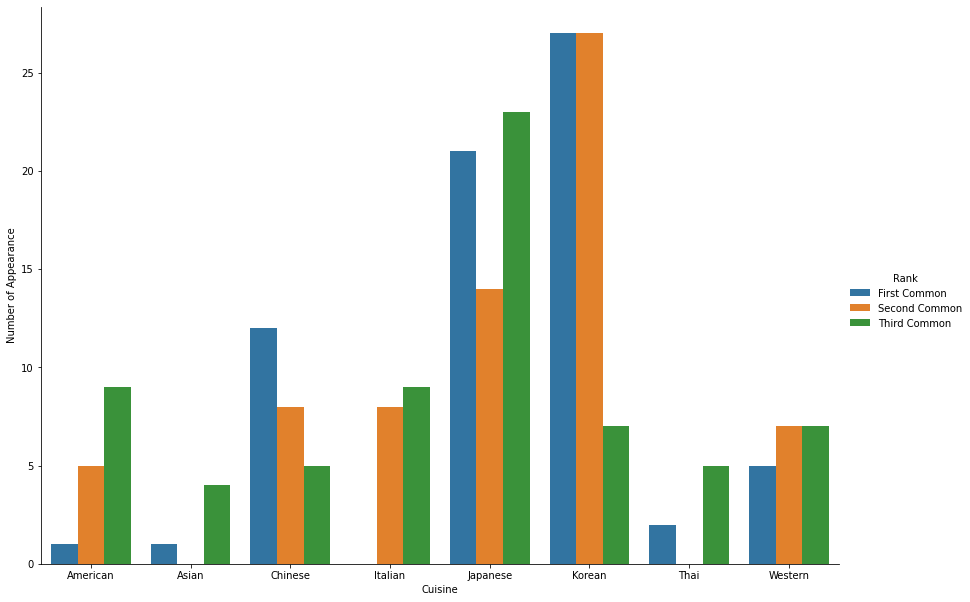

In [ ]:
MakeRankChart('Common',0)

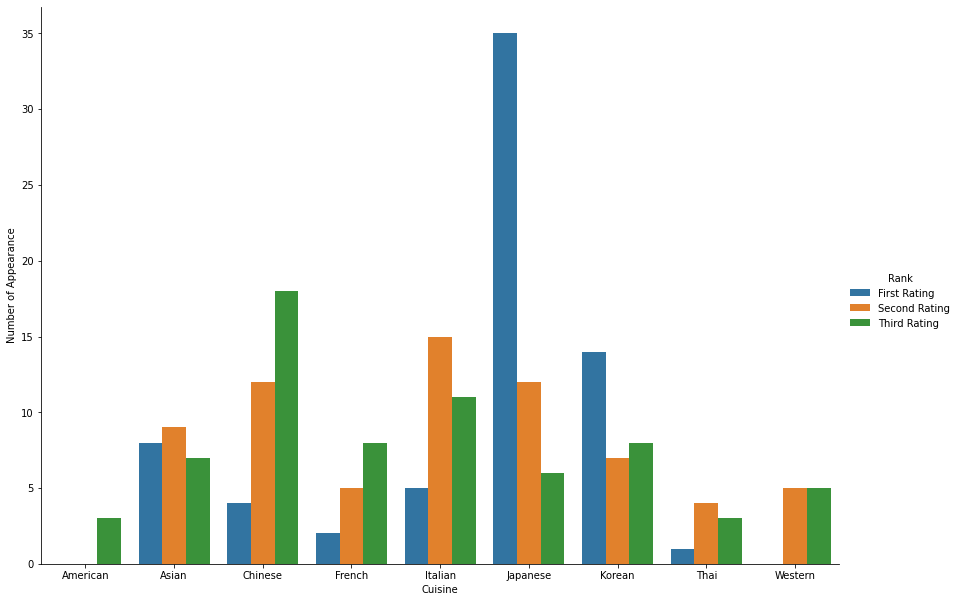

In [ ]:
MakeRankChart('Rating',0)

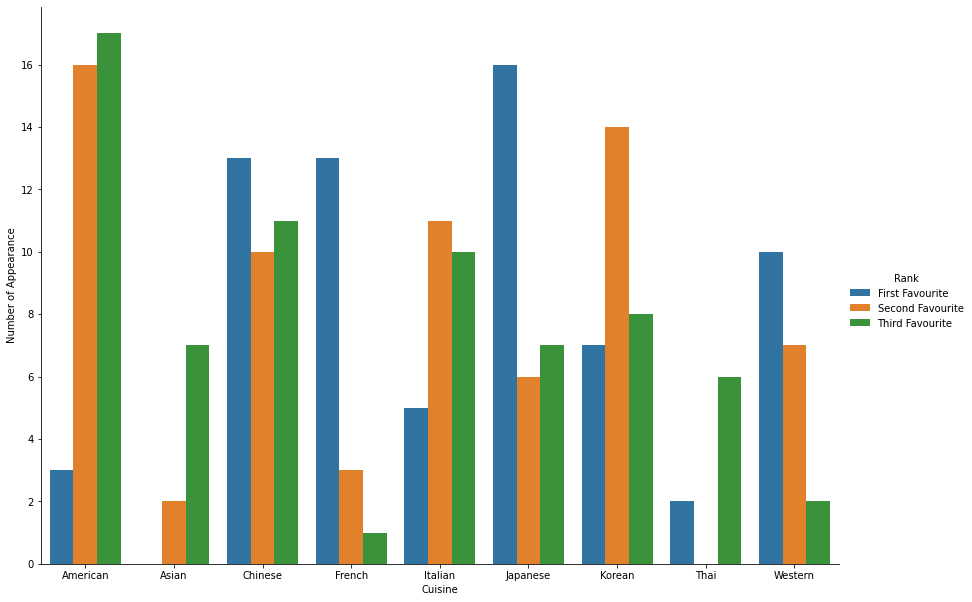

In [ ]:
MakeRankChart('Favourite',0)

Cluster 1: Crowded areas of the city (Ha Noi: Hoang Mai District, Ho Chi Minh City: District 5, District 11, District 2, Thu Duc District), have a lot of Asian restaurants (Japanese, Korean, Chinese) which have some common ground with Vietnamese. Restaurants in those areas usually serve family dining or affordable meal for for local residents and students. Common Italian dishes like pizza, spaghetti are also doing well in those areas.

### Cluster 2

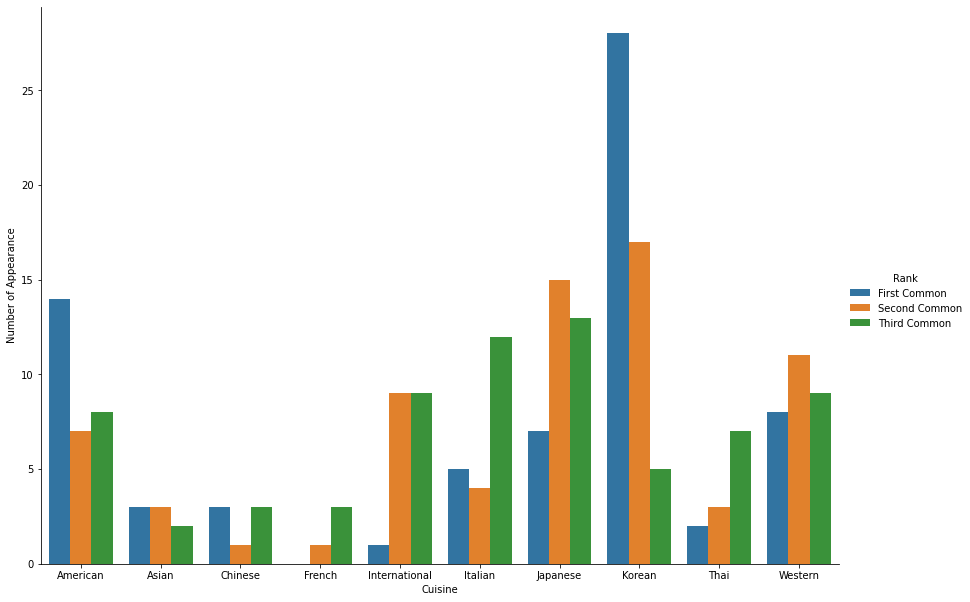

In [ ]:
MakeRankChart('Common',1)

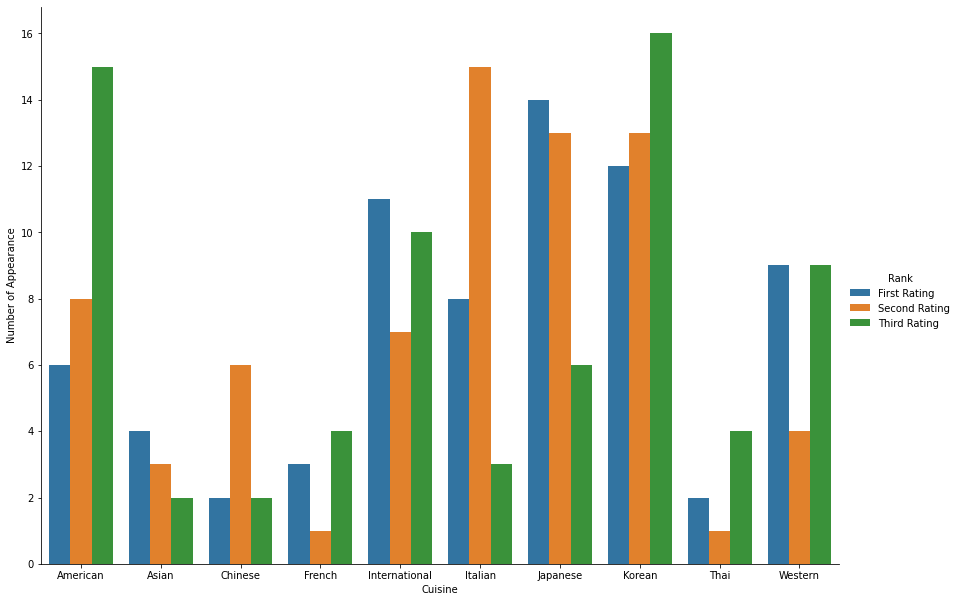

In [ ]:
MakeRankChart('Rating',1)

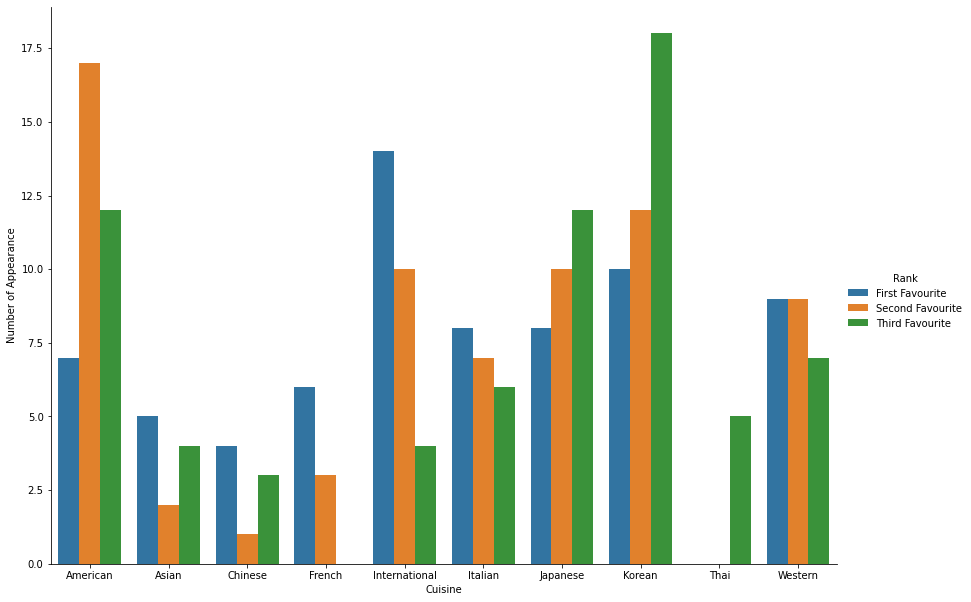

In [ ]:
MakeRankChart('Favourite',1)

Cluster 2: Farthest areas from the city center (Ha Noi: Tay Ho District, Ho Chi Minh City: District 6, District 8, Tan Phu District) which will not have many visiters or travelers so not much customers for luxury restaurants. In my opinion, a lot of Korean and American restaurants here it fast food restaurants which serve fried chicken, burger like KFC, Lotteria.

### Cluster 3

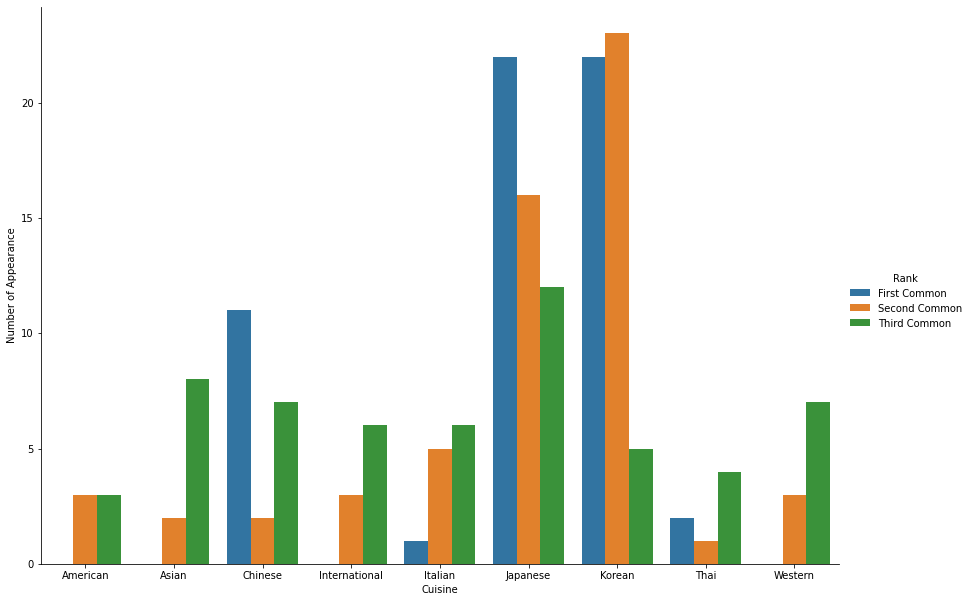

In [ ]:
MakeRankChart('Common',2)

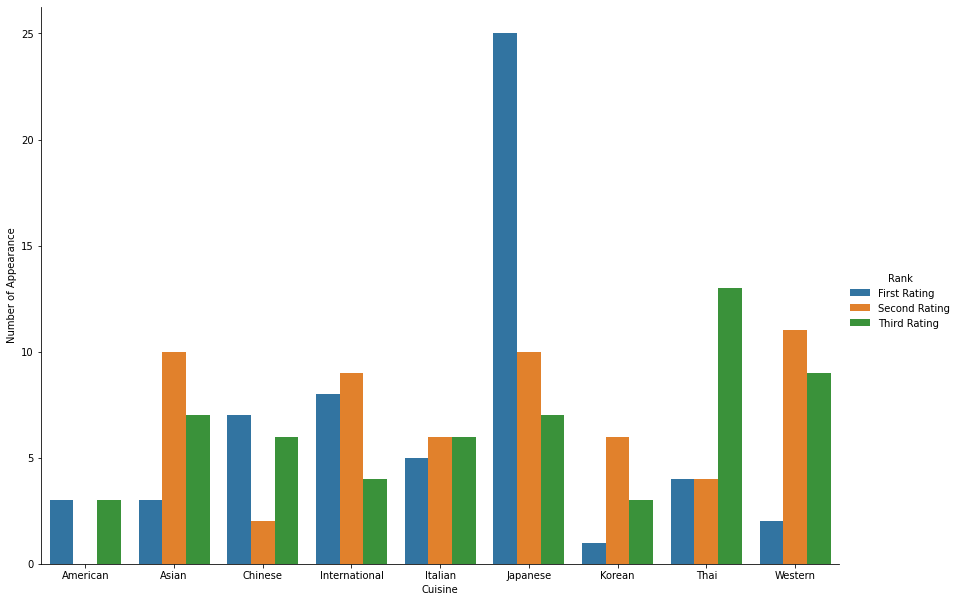

In [ ]:
MakeRankChart('Rating',2)

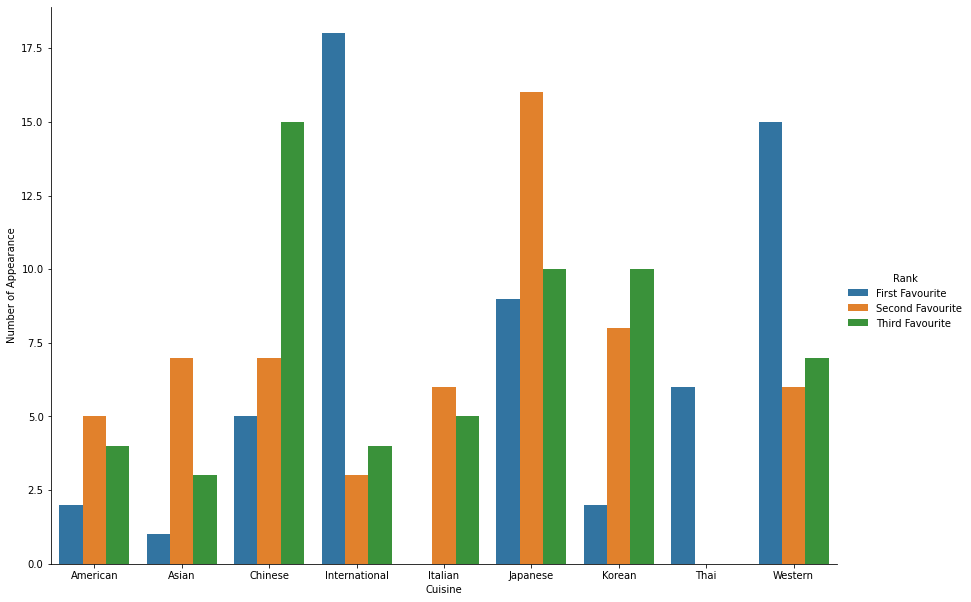

In [ ]:
MakeRankChart('Favourite',2)

Cluster 3: Middle areas between cluster 4 and others (Dong Da District in Ha Noi, District 4, District 10, Binh Thanh District and Tan Binh District in Ho Chi Minh City) those areas cuisines is interference of other areas which have diversity in what they serve. Japanese and Western cuisines is safe choice here.

### Cluster 4

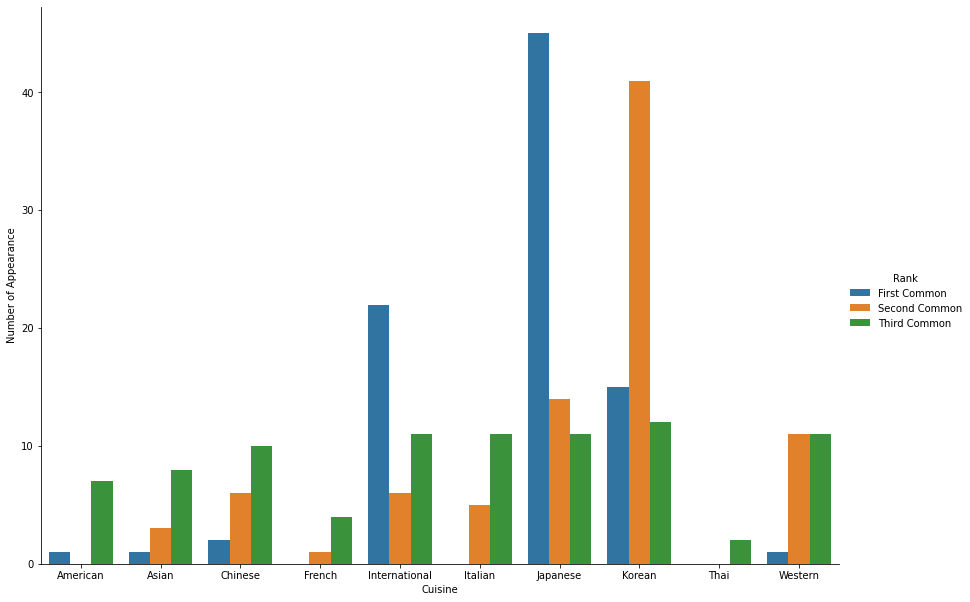

In [ ]:
MakeRankChart('Common',3)

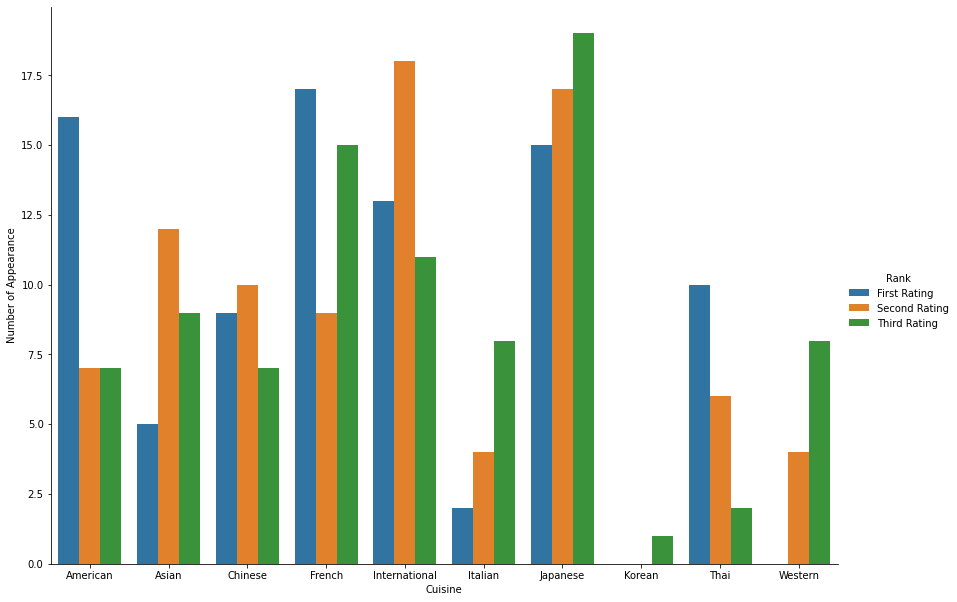

In [ ]:
MakeRankChart('Rating',3)

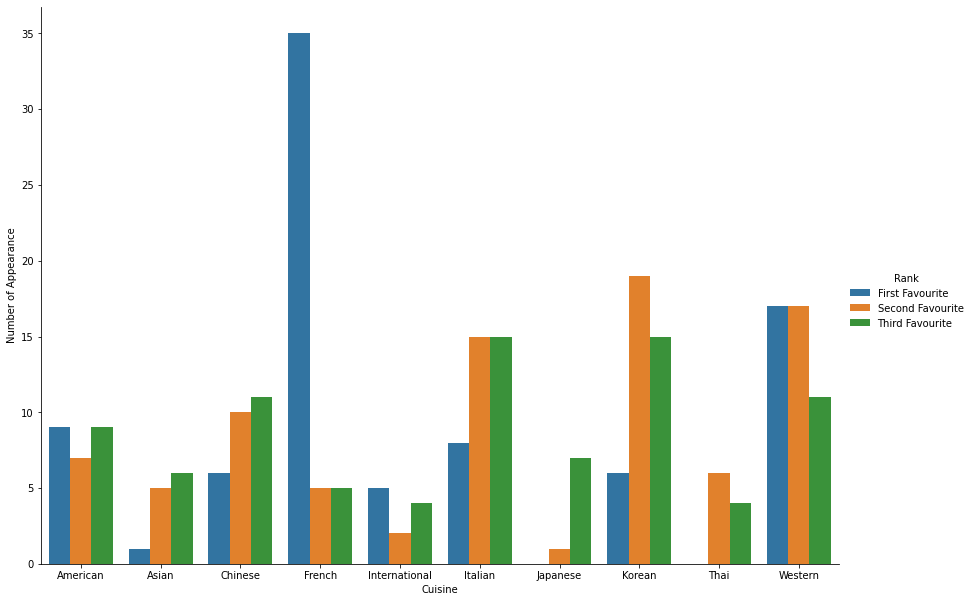

In [ ]:
MakeRankChart('Favourite',3)

Cluster 4: In the center of the city (Hoan Kiem District, Ba Dinh District in Ha Noi, District 1, District 3 in Ho Chi Minh City), those areas contains many luxury, fine dining restaurants. Japanese and French restaurants got highest rating scores and Western, French cuisines is the most favourite. Open a high-end French restaurants for business lunch, office party, convention event will be the best choice.




## Results and Discussion <a name="results"></a>

Our analysis was go through over 2500 restaurants in Ha Noi and Ho Chi Minh to find out what kind of restaurants is popular in each areas of two cities above. <br><br>
For luxury, fine dining restaurants for high-end customers, business lunchs or office parties, it should be located in the city center, such as Hoan Kiem District in Ha Noi, District 1, 3 in Ho Chi Minh City. Western, especially French and Japanese food will be love in those areas. <br><br>
In crowded neighborhood with a lot of students (Ha Noi: Hoang Mai District , Ho Chi Minh city: District 8, Dictrict 11, Thu Duc District), Asian and Italian restaurants which affordable price will take advantage here. <br><br>
In the area far from city center, it won't be a lot of restaurants there, mostly some American and Korean Fried chicken restaurants in those area.

## Conclusion <a name="conclusion"></a>

This project is done in order to help stakeholders to find optimal cuisines for their new restaurants and where they should open it. By using data from Foody, a food recommendation website in Vietnam, we cluster areas in Ha Noi and Ho Chi Minh city into clusters with specific characteristics.<br>
Depend on what the stakeholders want, they can use results from this project with some additional factors like spending power of areas, proximity to major roads, real estate availability, social and economic dynamics of every neighborhood to decide where to establish new restaurant.